In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/02 05:34:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df1 = spark.read.csv('violence_data.csv', header=True)

In [4]:
df1.show()

+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015| null|
|       1|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|
|       1|Afghanistan|     F|            Education|            Secondary|... if she burns ...| 01/01/2015| 13.7|
|       1|Afghanistan|     F|            Education|              Primary|... if she burns ...| 01/01/2015| 13.8|
|       1|Afghanistan|     F|       Marital status| Widowed, divorced...|... if she burns ...| 01/01/2015| 13.8|
|       1|Afghanistan|     F|           Employment|    Employed for kind|... if she burns ...| 0

In [3]:
df2 = spark.read.csv('Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv', header=True)
df2.show()

+------------+-----------------+-----------+--------------------+-----------+---------+------------+--------+
|DEPARTAMENTO|        MUNICIPIO|CODIGO DANE|        ARMAS MEDIOS|FECHA HECHO|   GENERO|GRUPO ETARIO|CANTIDAD|
+------------+-----------------+-----------+--------------------+-----------+---------+------------+--------+
|   ATLÁNTICO|BARRANQUILLA (CT)|    8001000|ARMA BLANCA / COR...|  1/01/2010|MASCULINO|     ADULTOS|       1|
|      BOYACÁ|          DUITAMA|   15238000|ARMA BLANCA / COR...|  1/01/2010| FEMENINO|     ADULTOS|       1|
|     CAQUETÁ|      PUERTO RICO|   18592000|ARMA BLANCA / COR...|  1/01/2010|MASCULINO|     ADULTOS|       1|
|    CASANARE|             MANÍ|   85139000|ARMA BLANCA / COR...|  1/01/2010| FEMENINO|     ADULTOS|       1|
|CUNDINAMARCA| BOGOTÁ D.C. (CT)|   11001000|ARMA BLANCA / COR...|  1/01/2010| FEMENINO|     ADULTOS|       1|
|       SUCRE|   SINCELEJO (CT)|   70001000|ARMA BLANCA / COR...|  1/01/2010| FEMENINO|     ADULTOS|       1|
|       VA

In [6]:
df1.describe().show()
df2.describe().show()

+-------+------------------+-----------+------+---------------------+---------------------+--------------------+-----------+------------------+
|summary|          RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|             Value|
+-------+------------------+-----------+------+---------------------+---------------------+--------------------+-----------+------------------+
|  count|             12600|      12600| 12600|                12600|                12600|               12600|      12600|             11187|
|   mean|             210.5|       null|  null|                 null|                 null|                null|       null| 19.76253687315632|
| stddev|121.24802439346753|       null|  null|                 null|                 null|                null|       null|16.986436699740587|
|    min|                 1|Afghanistan|     F|                  Age|                15-24|... for at least ...| 01/01/2000|            

+-------+------------+---------+--------------------+-------------------+------------------+----------+------------+------------------+
|summary|DEPARTAMENTO|MUNICIPIO|         CODIGO DANE|       ARMAS MEDIOS|       FECHA HECHO|    GENERO|GRUPO ETARIO|          CANTIDAD|
+-------+------------+---------+--------------------+-------------------+------------------+----------+------------+------------------+
|  count|      476970|   476970|              476970|             476968|            476970|    476967|      475355|            476970|
|   mean|        null|     null| 3.775064627790055E7|               null|           44277.5|      null|        null|1.7077635910015305|
| stddev|        null|     null|2.7493718706527118E7|               null|47.216825088399965|      null|        null|3.3386471151634227|
|    min|    AMAZONAS|ABEJORRAL|            11001000|                  -|         1/01/2010|         -|ADOLESCENTES|                 1|
|    max|     VICHADA|    ÚTICA|          NO REP

In [7]:
df1.printSchema()
df2.printSchema()

root
 |-- RecordID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: string (nullable = true)

root
 |-- DEPARTAMENTO: string (nullable = true)
 |-- MUNICIPIO: string (nullable = true)
 |-- CODIGO DANE: string (nullable = true)
 |-- ARMAS MEDIOS: string (nullable = true)
 |-- FECHA HECHO: string (nullable = true)
 |-- GENERO: string (nullable = true)
 |-- GRUPO ETARIO: string (nullable = true)
 |-- CANTIDAD: string (nullable = true)



In [4]:
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType,IntegerType

# Change the data type using the withColumn method
df1 = df1.withColumn("Value", col("Value").cast(FloatType()))
df1 = df1.withColumn("RecordID", col("RecordID").cast(IntegerType()))
df2 = df2.withColumn("CANTIDAD", col("CANTIDAD").cast(IntegerType()))

In [9]:
df1.printSchema()
df2.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: float (nullable = true)

root
 |-- DEPARTAMENTO: string (nullable = true)
 |-- MUNICIPIO: string (nullable = true)
 |-- CODIGO DANE: string (nullable = true)
 |-- ARMAS MEDIOS: string (nullable = true)
 |-- FECHA HECHO: string (nullable = true)
 |-- GENERO: string (nullable = true)
 |-- GRUPO ETARIO: string (nullable = true)
 |-- CANTIDAD: integer (nullable = true)



In [10]:
df1.select("RecordID", "Value").describe().show()
df2.select("CANTIDAD").describe().show()

+-------+------------------+------------------+
|summary|          RecordID|             Value|
+-------+------------------+------------------+
|  count|             12600|             11187|
|   mean|             210.5| 19.76253687099183|
| stddev|121.24802439346753|16.986436699962074|
|    min|                 1|               0.0|
|    max|               420|              86.9|
+-------+------------------+------------------+



+-------+------------------+
|summary|          CANTIDAD|
+-------+------------------+
|  count|            476970|
|   mean|1.7077635910015305|
| stddev|3.3386471151634227|
|    min|                 1|
|    max|               130|
+-------+------------------+



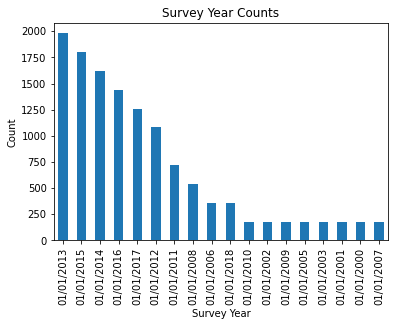

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert a Spark DataFrame to a pandas DataFrame
df1_pd = df1.toPandas()

df1_pd['Survey Year'].value_counts().plot(kind='bar')
plt.xlabel('Survey Year')
plt.ylabel('Count')
plt.title('Survey Year Counts')
plt.show()

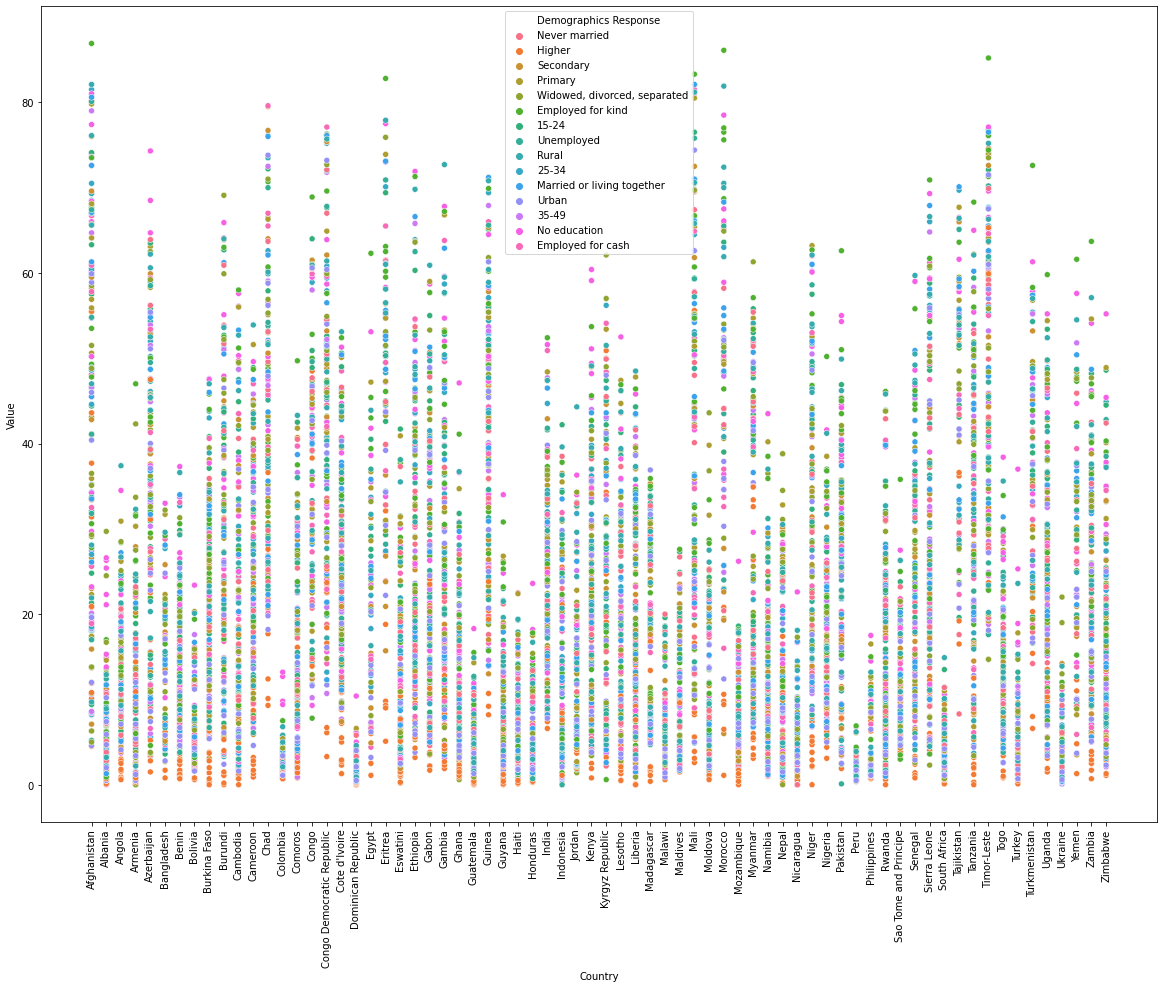

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.scatterplot(data=df1_pd, x='Country', y='Value', hue='Demographics Response')
plt.legend(title='Demographics Response')
plt.xticks(rotation=90)
plt.show()

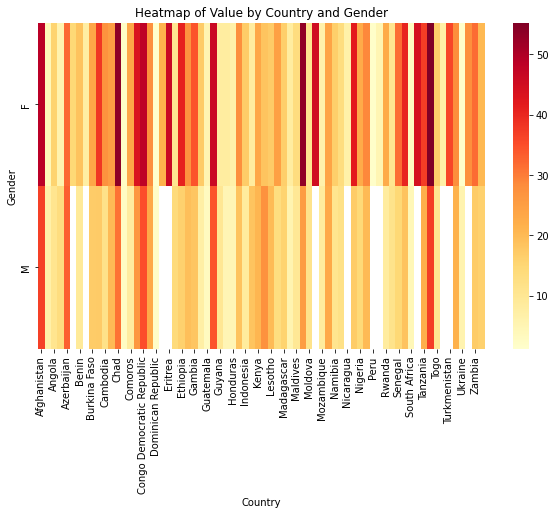

In [13]:
pivot_df = df1_pd.pivot_table(values='Value', index='Gender', columns='Country')
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_df, annot=False, fmt='.2f', cmap='YlOrRd', cbar=True)
plt.title('Heatmap of Value by Country and Gender')
plt.show()

In [6]:
from pyspark.sql.functions import col

null_counts = [df1.filter(col(col_name).isNull()).count() for col_name in df1.columns]
total_rows = df1.count()
null_percentages = [(col_name, null_count / total_rows * 100) for col_name, null_count in zip(df1.columns, null_counts)]

for col_name, null_percentage in null_percentages:
    print(f"column {col_name} ：percentage of null value: {null_percentage:.2f}%")
for i, col_name in enumerate(df1.columns):
    print(f"column {col_name} ：total null value: {null_counts[i]}")

column RecordID ：percentage of null value: 0.00%
column Country ：percentage of null value: 0.00%
column Gender ：percentage of null value: 0.00%
column Demographics Question ：percentage of null value: 0.00%
column Demographics Response ：percentage of null value: 0.00%
column Question ：percentage of null value: 0.00%
column Survey Year ：percentage of null value: 0.00%
column Value ：percentage of null value: 11.21%
column RecordID ：total null value: 0
column Country ：total null value: 0
column Gender ：total null value: 0
column Demographics Question ：total null value: 0
column Demographics Response ：total null value: 0
column Question ：total null value: 0
column Survey Year ：total null value: 0
column Value ：total null value: 1413


In [7]:

duplicate_row_count = df1.groupBy(df1.columns).count().filter(col("count") > 1).count()
print(f"duplicate_row_count: {duplicate_row_count}")

duplicate_row_count: 0


<AxesSubplot:>

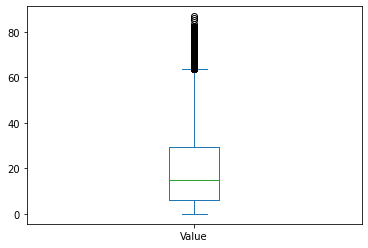

In [8]:
df1_pd['Value'].plot.box()

In [10]:
from pyspark.sql.functions import col

null_counts = [df2.filter(col(col_name).isNull()).count() for col_name in df2.columns]
total_rows = df2.count()
null_percentages = [(col_name, null_count / total_rows * 100) for col_name, null_count in zip(df2.columns, null_counts)]

for col_name, null_percentage in null_percentages:
    print(f"column {col_name} ：percentage of null value: {null_percentage:.2f}%")
for i, col_name in enumerate(df2.columns):
    print(f"column {col_name} ：total null value: {null_counts[i]}")

column DEPARTAMENTO ：percentage of null value: 0.00%
column MUNICIPIO ：percentage of null value: 0.00%
column CODIGO DANE ：percentage of null value: 0.00%
column ARMAS MEDIOS ：percentage of null value: 0.00%
column FECHA HECHO ：percentage of null value: 0.00%
column GENERO ：percentage of null value: 0.00%
column GRUPO ETARIO ：percentage of null value: 0.34%
column CANTIDAD ：percentage of null value: 0.00%
column DEPARTAMENTO ：total null value: 0
column MUNICIPIO ：total null value: 0
column CODIGO DANE ：total null value: 0
column ARMAS MEDIOS ：total null value: 2
column FECHA HECHO ：total null value: 0
column GENERO ：total null value: 3
column GRUPO ETARIO ：total null value: 1615
column CANTIDAD ：total null value: 0


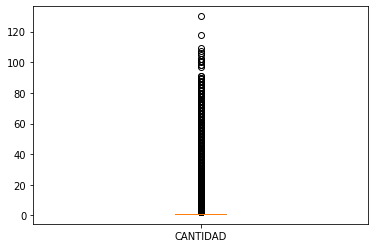

In [18]:
df2_pd = df2.toPandas()
plt.boxplot(df2_pd['CANTIDAD'])
plt.xticks([1], ['CANTIDAD'])
plt.show()